<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.10


In [ ]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install --upgrade datetime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# **MC Census Data: mcPop**

In [ ]:
mcPop = pd.read_csv('mcPop.csv')
mcPop.head()

,Unnamed: 0,Zip Code,AREALAND,AREAWATR,Population,HU100,NH White,NH Black,NH American Indian,NH Asian,NH Native Hawaiian,NH Other,NHT,Hispanic,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,Pop 65+,PCTPOP65_,Shape_Area
0,62,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07
1,102,20777,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,3.274726e+07
2,111,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06
3,112,20814,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,2.192136e+07
4,113,20815,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,2.337013e+07


Drop unnamed columns

In [ ]:
mcPop = mcPop.loc[:, ~mcPop.columns.str.contains('^Unnamed')]

In [ ]:
mcPop.head()

,Zip Code,AREALAND,AREAWATR,Population,HU100,NH White,NH Black,NH American Indian,NH Asian,NH Native Hawaiian,NH Other,NHT,Hispanic,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,Pop 65+,PCTPOP65_,Shape_Area
0,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07
1,20777,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,3.274726e+07
2,20812,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,1.437529e+06
3,20814,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,2.192136e+07
4,20815,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,2.337013e+07


In [ ]:
std_zip = mcPop['Zip Code'].unique()

# **Dataset: Crime**

## **Data Wrangling**

In [ ]:
import json
import requests

In [ ]:
#crime_json = requests.get('https://data.montgomerycountymd.gov/resource/icn6-v9z3.json')
#crime_0 = pd.DataFrame(crime_json.json())

data source: https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3/data

In [ ]:
crime_0 = pd.read_csv('Crime.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
crime_0.shape

(245795, 30)

In [ ]:
crime_0.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [ ]:
crime_0.duplicated().sum()

0

In [ ]:
crime_col = ['Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Zip Code', 'Start_Date_Time']
crime_sel = crime_0[crime_col]

In [ ]:
crime_sel['Year'] = pd.to_datetime(crime_sel['Start_Date_Time']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
crime_sel['Year'].unique()

array([2020, 2018, 2019, 2017, 2016, 2021])

In [ ]:
crime_sel.isnull().sum()

Victims               0
Crime Name1         188
Crime Name2         188
Crime Name3         188
Zip Code           3192
Start_Date_Time       0
Year                  0
dtype: int64

In [ ]:
crime_sel = crime_sel.dropna()

In [ ]:
crime_sel.shape

(242415, 7)

In [ ]:
crime_sel['Zip Code'].nunique()

179

In [ ]:
mcCrime = crime_sel[crime_sel['Zip Code'].isin(std_zip)]

In [ ]:
mcCrime['Zip Code'].unique() # zip code 21770 missing, but negligible

array([20816., 20872., 20876., 20860., 20878., 20854., 20874., 20895.,
       20850., 20902., 20877., 20886., 20879., 20906., 20851., 20904.,
       20852., 20910., 20912., 20901., 20814., 20871., 20905., 20815.,
       20903., 20817., 20866., 20855., 20853., 20832., 20837., 20882.,
       20833., 20818., 20841., 20861., 20842., 20868., 20707., 21771.,
       20812., 20862., 20838., 20777., 20839., 21797.])

In [ ]:
mcCrime['Zip Code'] = mcCrime['Zip Code'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mcCrime.head()

,Victims,Crime Name1,Crime Name2,Crime Name3,Zip Code,Start_Date_Time,Year
0,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,20816,03/18/2020 09:00:00 PM,2020
1,1,Other,All Other Offenses,POLICE INFORMATION,20872,03/19/2020 01:00:00 PM,2020
2,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,20876,08/19/2020 06:30:00 PM,2020
3,1,Crime Against Property,Embezzlement,EMBEZZLE (DESCRIBE OFFENSE),20860,11/02/2018 03:34:00 PM,2018
4,1,Crime Against Society,All Other Offenses,SEX OFFENSE - FAILURE TO REGISTER AS A SEX OFF...,20878,11/02/2018 12:00:00 AM,2018


In [ ]:
mcCrime[(mcCrime['Year']==2016 | 2019 | 2021) & (mcCrime['Zip Code']==20777)]

,Victims,Crime Name1,Crime Name2,Crime Name3,Zip Code,Start_Date_Time,Year


In [ ]:
mcCrime[(mcCrime['Year']==2021) & (mcCrime['Zip Code']==20707)]

,Victims,Crime Name1,Crime Name2,Crime Name3,Zip Code,Start_Date_Time,Year


Add rows with zero victims to the zip codes that have no rows of years

In [ ]:
new_20777_2016 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2016 12:00:00 AM', 'Year': 2016}
new_20777_2019 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2019 12:00:00 AM', 'Year': 2019}
new_20707_2021 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20707, 
                  'Start_Date_Time': '01/01/2021 12:00:00 AM', 'Year': 2021}
new_20777_2021 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2021 12:00:00 AM', 'Year': 2021}
mcCrime = mcCrime.append([new_20777_2016, new_20777_2019, new_20707_2021, new_20777_2021], ignore_index=True)
#mcCrime = mcCrime.append(new_20777_2019, ignore_index=True)

In [ ]:
mcCrime.to_csv('mcCrime.csv')

## **Data Visualizations**

In [ ]:
mcPopCrime = mcPop.merge(mcCrime, left_on='Zip Code', right_on='Zip Code') #.drop(columns=['Zip Code'])

In [ ]:
mcPopCrime.head()

,Zip Code,AREALAND,AREAWATR,Population,HU100,NH White,NH Black,NH American Indian,NH Asian,NH Native Hawaiian,NH Other,NHT,Hispanic,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,Pop 65+,PCTPOP65_,Shape_Area,Victims,Crime Name1,Crime Name2,Crime Name3,Start_Date_Time,Year
0,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07,1,Other,All Other Offenses,OVERDOSE,07/15/2020 09:17:00 PM,2020
1,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07,1,Crime Against Property,Identity Theft,IDENTITY THEFT,10/10/2019 06:00:00 PM,2019
2,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,07/11/2016 09:00:00 PM,2016
3,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,01/11/2020 10:00:00 PM,2020
4,20707,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,4.827461e+07,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SMUGGLE,07/28/2016 07:30:00 AM,2016


In [ ]:
plt.rcParams['figure.figsize'] = (15, 6) # global fugure size

In [ ]:
by_col = ['Crime Name1', 'Crime Name2', 'Crime Name3', 'Zip Code', 'Year']
summaries = {'Victims': 'sum', 'Population': 'mean'}
mcPopCrime_byCol = mcPopCrime.groupby(by=by_col).agg(summaries).reset_index()

In [ ]:
mcPopCrime_byCol['Zip Code'].unique()

array([20814, 20817, 20832, 20837, 20838, 20850, 20851, 20853, 20854,
       20866, 20868, 20871, 20872, 20874, 20876, 20877, 20878, 20879,
       20882, 20886, 20901, 20902, 20903, 20904, 20905, 20906, 20910,
       20912, 20707, 20815, 20833, 20841, 20842, 20852, 20855, 20895,
       21771, 20816, 20860, 20861, 20818, 20862, 20812, 20839, 20777,
       21797])

In [ ]:
mcPopCrime_byCol = mcPopCrime_byCol.sort_values('Zip Code')

In [ ]:
mcPopCrime_byCol['Zip Code'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20882, 20886, 20895,
       20901, 20902, 20903, 20904, 20905, 20906, 20910, 20912, 21771,
       21797])

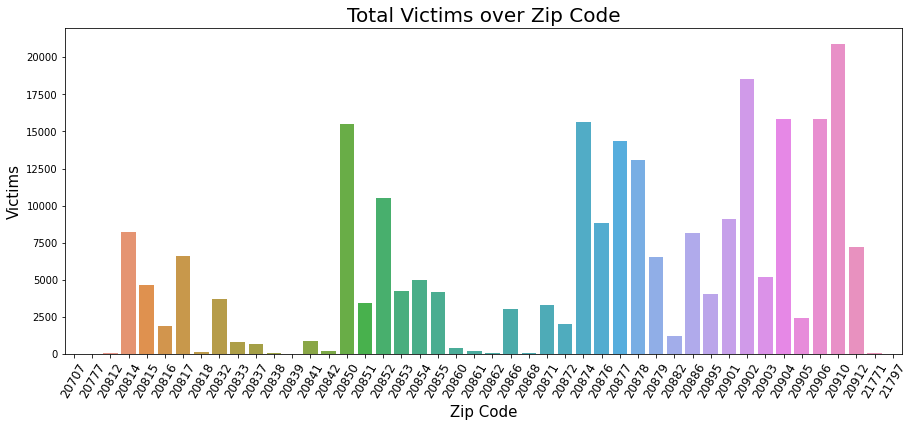

In [ ]:
sns.barplot(data=mcPopCrime_byCol, x='Zip Code', y='Victims', ci=None, estimator=sum)

plt.title('Total Victims over Zip Code', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

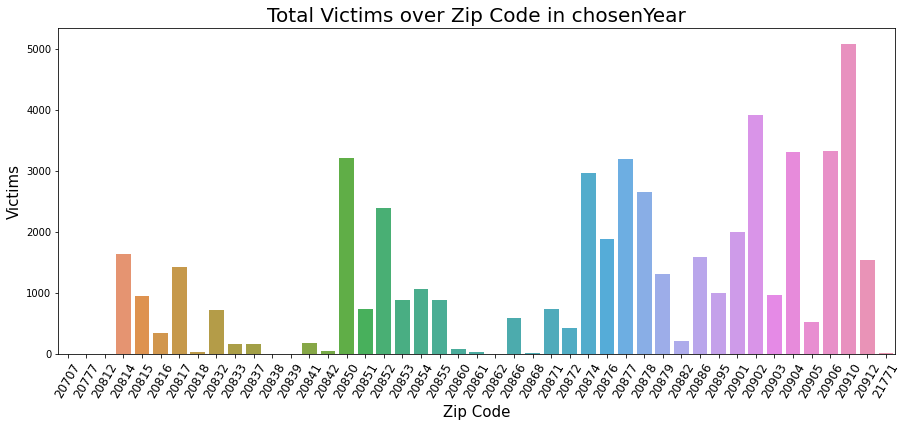

In [ ]:
chosenYear = 2019
mcPopCrime_byCol_Year = mcPopCrime_byCol[mcPopCrime_byCol['Year'] == chosenYear]

sns.barplot(data=mcPopCrime_byCol_Year, x='Zip Code', y='Victims', estimator=sum, ci=None)

plt.title('Total Victims over Zip Code in chosenYear', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

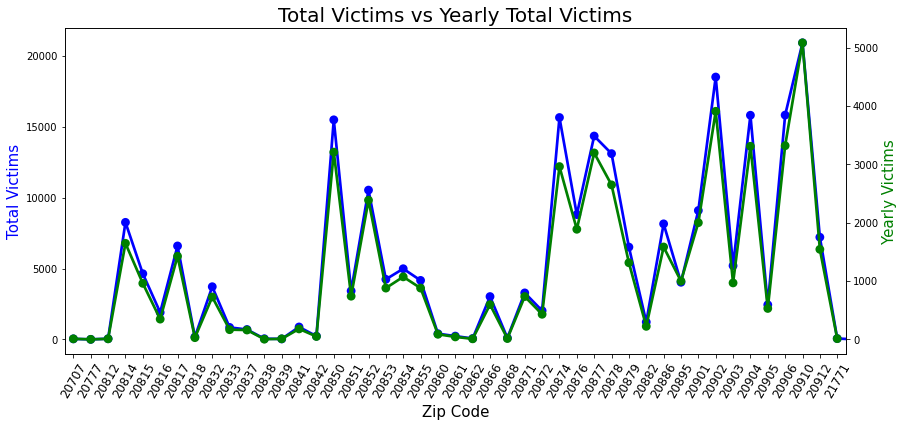

In [ ]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopCrime_byCol, x='Zip Code', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopCrime_byCol_Year, x='Zip Code', y='Victims', color='green', ci=None, estimator=sum)

ax.set_title('Total Victims vs Yearly Total Victims', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcPopCrime_byCol_Year['Zip Code'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Yearly Victims', size=15, color='green')

plt.show()

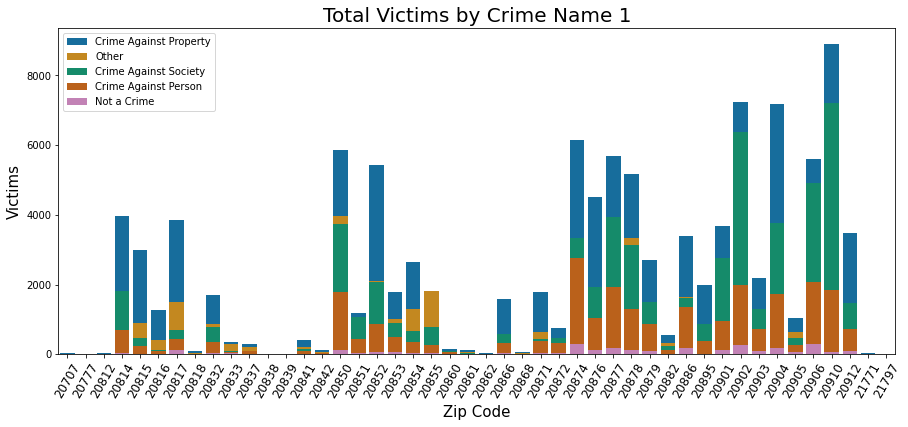

In [ ]:
sns.barplot(data=mcPopCrime_byCol, x='Zip Code', y='Victims', hue='Crime Name1', palette='colorblind',
            dodge=False, orient='v', ci=None, estimator=sum)

plt.title('Total Victims by Crime Name 1', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)
plt.legend(loc='upper left')
plt.show()

In [ ]:
x_array = np.sort(mcPopCrime_byCol['Zip Code'].unique())

fig =px.bar(mcPopCrime_byCol, x='Zip Code', y='Victims', color='Crime Name1', barmode='stack',
            color_continuous_scale=px.colors.sequential.Greens) # labels={'Zip Code': 'Zip Code'} same as xaxis title below

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=-60, tickfont_size=11) # categoryorder='total descending' to display bars in descending order

fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')

fig.update_layout(title_text='Total Victims by Crime Name 1', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)

fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey') # showlegend=False, legend_font_size=10
fig.show()

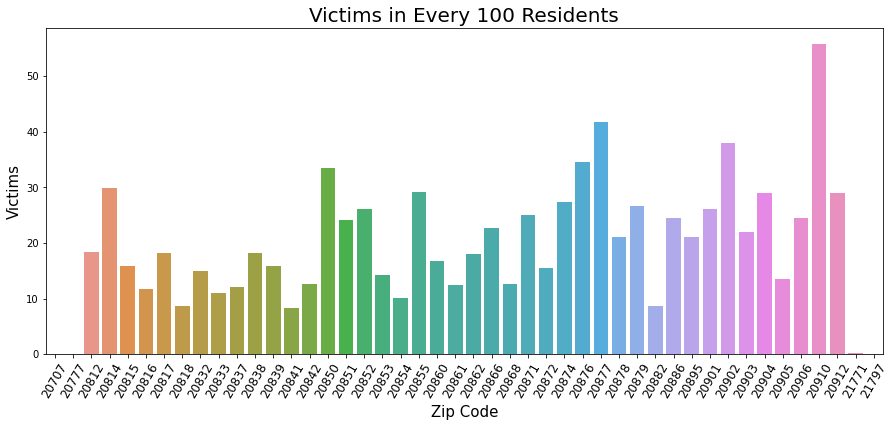

In [ ]:
sns.barplot(data=mcPopCrime_byCol, x='Zip Code', y=mcPopCrime_byCol['Victims']/mcPopCrime_byCol['Population']*100, 
            ci=None, estimator=sum)

plt.title('Victims in Every 100 Residents', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

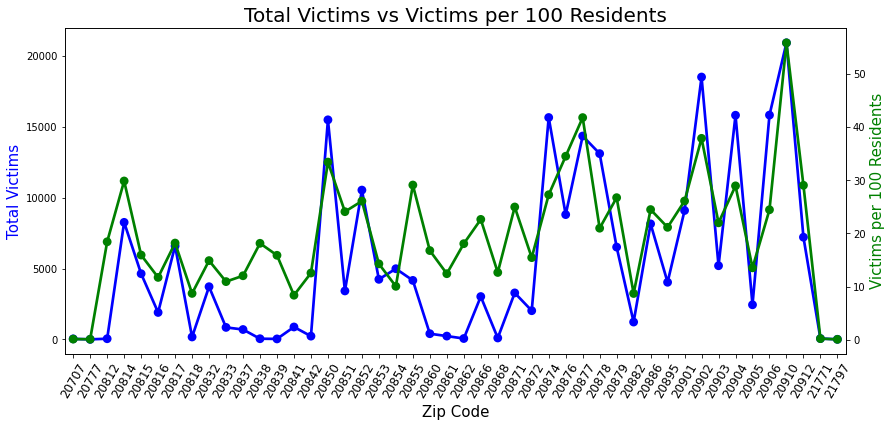

In [ ]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopCrime_byCol, x='Zip Code', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopCrime_byCol, x='Zip Code', 
              y=mcPopCrime_byCol['Victims']/mcPopCrime_byCol['Population']*100, color='green',
              ci=None, estimator=sum)

ax.set_title('Total Victims vs Victims per 100 Residents', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcPopCrime_byCol['Zip Code'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Victims per 100 Residents', size=15, color='green')

plt.show()

In [ ]:
summaries = {'Victims': 'sum', 'Population': 'mean'}
mcPopCrime_byZip = mcPopCrime.groupby('Zip Code').agg(summaries).reset_index()

In [ ]:
x_array = np.sort(mcPopCrime_byZip['Zip Code'].unique())

fig =px.line(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*10000, 
             color=px.Constant('Victims per 10000'))

fig.add_bar(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Victims'], name='Total Victims')

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=-60, tickfont_size=11)

fig.update_yaxes(title='Victims', tickfont_size=11)

fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')

fig.update_layout(title_text='Total Victims vs Victims per 10000 Residents', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)

fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey')
fig.show()